In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
DataE = pd.read_csv("agent_followup_data - Dataset.csv")
DataE.head()

id        followup_date            lead_created_at  leadId followup_type  \
0   1  2020-03-05 14:38:54  2019-11-04 16:12:00-05:00   20293         calls   
1   2  2020-03-05 14:38:55  2019-11-04 16:12:00-05:00   20293         calls   
2   3  2020-01-06 19:11:39  2019-12-26 08:30:32-05:00   49122         calls   
3   4  2020-08-31 13:12:53  2020-08-30 19:39:18-04:00   58040         calls   
4   5  2020-10-14 14:47:23  2017-01-28 11:04:00-05:00   36567         calls   

   agentId                         additional_data  
0       10   {'duration': 0, 'is_incoming': False}  
1       10   {'duration': 0, 'is_incoming': False}  
2        4  {'duration': 91, 'is_incoming': False}  
3        9   {'duration': 0, 'is_incoming': False}  
4        9   {'duration': 0, 'is_incoming': False}

In [3]:
DataE.tail()

id        followup_date            lead_created_at  leadId  \
68349  68350  2020-03-11 21:10:18  2018-03-17 09:09:00-04:00   31965   
68350  68351  2020-03-11 21:11:12  2018-03-17 09:09:00-04:00   31965   
68351  68352  2020-03-20 17:08:10  2018-03-17 09:09:00-04:00   31965   
68352  68353  2020-06-05 15:24:48  2017-12-05 05:10:00-05:00   27972   
68353  68354  2020-01-22 20:26:54  2019-07-16 09:56:00-04:00   16281   

      followup_type  agentId         additional_data  
68349  textmessages        4   {'is_incoming': True}  
68350  textmessages        4  {'is_incoming': False}  
68351  textmessages        4  {'is_incoming': False}  
68352  textmessages        7  {'is_incoming': False}  
68353  textmessages        4  {'is_incoming': False}

In [4]:
DataE.shape

(68354, 7)

*__We have 68354 rows and 7 columns in Real Estate Data set.__

In [5]:
#ratio of null values
DataE.isnull().sum()/DataE.shape[0] *100

id                 0.0
followup_date      0.0
lead_created_at    0.0
leadId             0.0
followup_type      0.0
agentId            0.0
additional_data    0.0
dtype: float64

In [6]:
#categorical features
categorical = DataE.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= DataE.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 4
Numerical Features in Train Set: 3


### Step 3: Data Cleaning

In [7]:
DataE.isnull().sum()

id                 0
followup_date      0
lead_created_at    0
leadId             0
followup_type      0
agentId            0
additional_data    0
dtype: int64

### Step 4: Exploratory Data Analysis

In [8]:
DataE.columns

Index(['id', 'followup_date', 'lead_created_at', 'leadId', 'followup_type',
       'agentId', 'additional_data'],
      dtype='object')

In [9]:
DataE.head()

id        followup_date            lead_created_at  leadId followup_type  \
0   1  2020-03-05 14:38:54  2019-11-04 16:12:00-05:00   20293         calls   
1   2  2020-03-05 14:38:55  2019-11-04 16:12:00-05:00   20293         calls   
2   3  2020-01-06 19:11:39  2019-12-26 08:30:32-05:00   49122         calls   
3   4  2020-08-31 13:12:53  2020-08-30 19:39:18-04:00   58040         calls   
4   5  2020-10-14 14:47:23  2017-01-28 11:04:00-05:00   36567         calls   

   agentId                         additional_data  
0       10   {'duration': 0, 'is_incoming': False}  
1       10   {'duration': 0, 'is_incoming': False}  
2        4  {'duration': 91, 'is_incoming': False}  
3        9   {'duration': 0, 'is_incoming': False}  
4        9   {'duration': 0, 'is_incoming': False}

In [10]:
DataE['agentId'].value_counts()

4     15290
10    11655
5     11241
9      9281
7      7819
6      5606
2      4086
8      2732
3       529
0       115
Name: agentId, dtype: int64

In [13]:
DataE['agentId']= DataE['agentId'].astype(str)

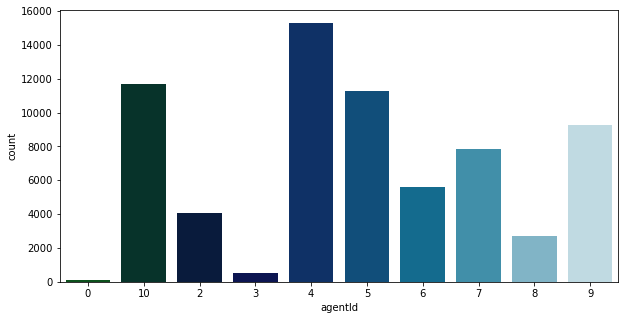

In [15]:
plt.figure(figsize=(10,5))
sns.countplot('agentId',data=DataE,palette='ocean')

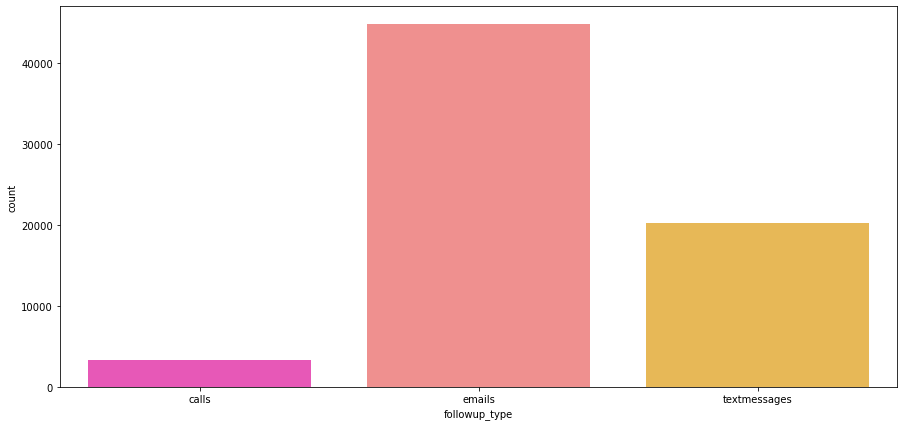

In [20]:
plt.figure(figsize=(15,7))
sns.countplot('followup_type',data=DataE,palette='spring')

In [24]:
No_of_follow_up = DataE.groupby("followup_type")["agentId"].value_counts()
No_of_follow_up

followup_type  agentId
calls          4           1087
               9            814
               10           647
               8            293
               6            210
               7            183
               2             65
               5              6
emails         5          11065
               9           7292
               4           7140
               10          5630
               7           5207
               2           3706
               6           2256
               8           1945
               3            516
textmessages   4           7063
               10          5378
               6           3140
               7           2429
               9           1175
               8            494
               2            315
               5            170
               0            115
               3             13
Name: agentId, dtype: int64

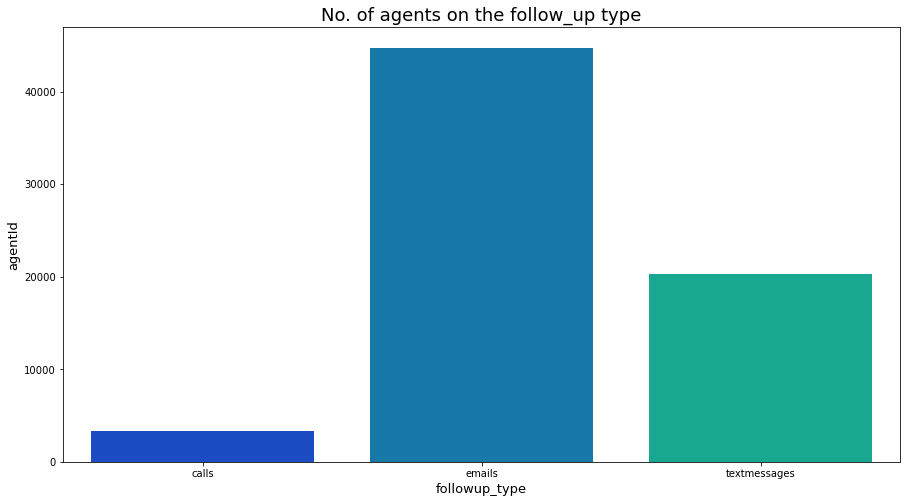

In [29]:
plt.figure(figsize = (15,8))
sns.countplot('followup_type',data=DataE,palette="winter")
plt.title("No. of agents on the follow_up type",fontsize=18)
plt.xlabel("followup_type",fontsize=13)
plt.ylabel('agentId',fontsize=13)
plt.show()

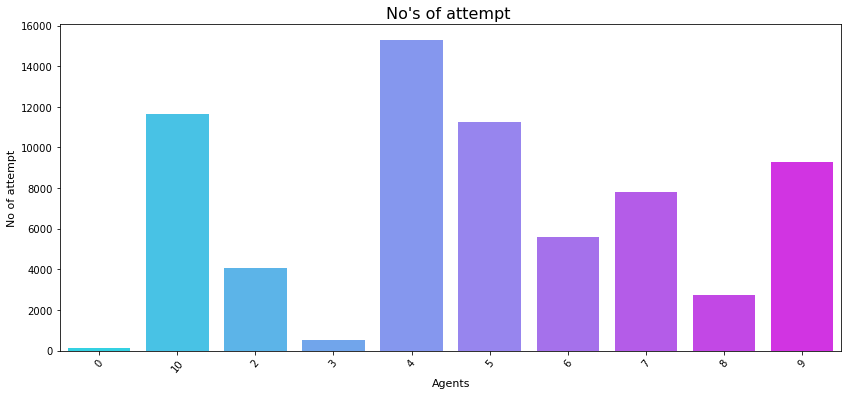

In [30]:
plt.figure(figsize = (14,6))
sns.countplot(x='agentId',data=DataE, palette='cool')
plt.title("No's of attempt ",fontsize=16)
plt.xticks(rotation=50)
plt.xlabel("Agents",fontsize=11)
plt.ylabel("No of attempt",fontsize=11)
plt.show()

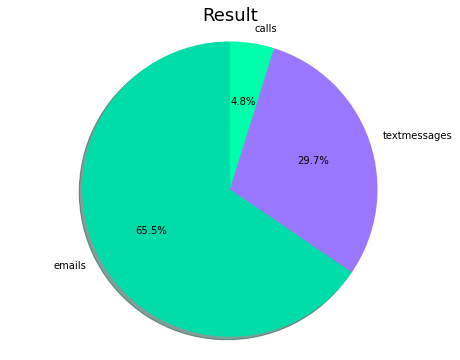

In [33]:
Numbers =DataE.followup_type.value_counts()
labels=np.array(Numbers.index)
sizes = Numbers.values
colors = ['#00DDAA', '#9977FF', '#00FFAA']
plt.figure(figsize = (8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Result',fontsize=18)
plt.axis('equal',fontsize=8)
plt.show()

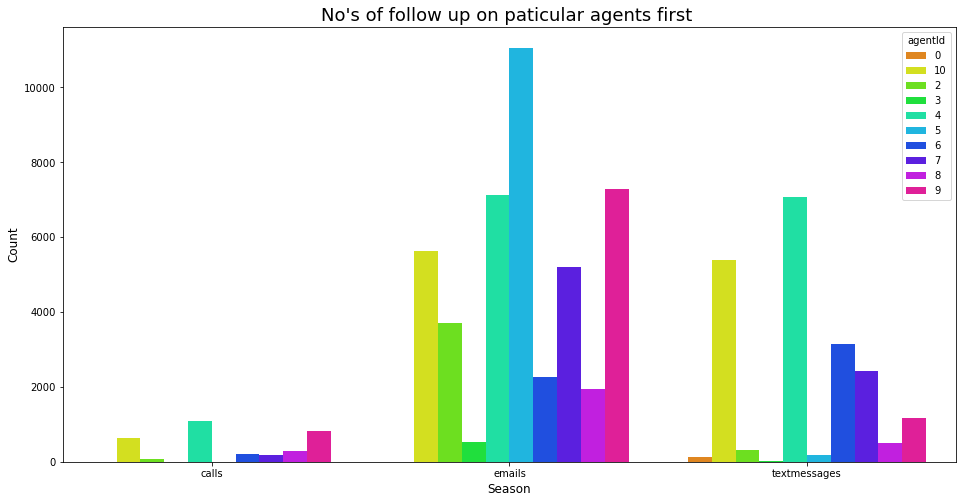

In [34]:
plt.figure(figsize = (16,8))
sns.countplot('followup_type',hue='agentId',data=DataE,palette='hsv')
plt.title("No's of follow up on paticular agents first ",fontsize=18)
plt.xlabel("Season",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

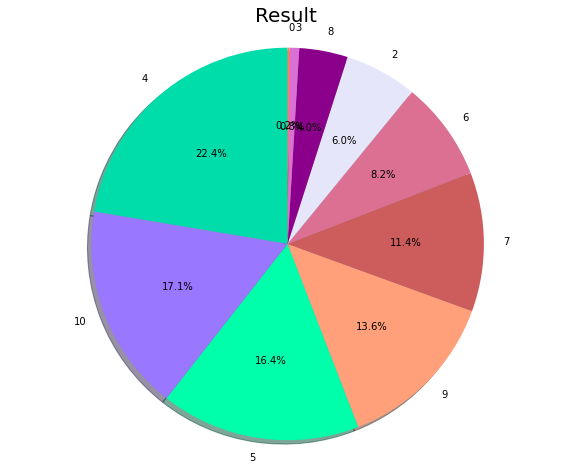

In [39]:
Numbers2 =DataE.agentId.value_counts()
labels=np.array(Numbers2.index)
sizes = Numbers2.values
colors = ['#00DDAA', '#9977FF', '#00FFAA', '#FFA07A', '#CD5C5C', '#DB7093', '#E6E6FA', '#8B008B', '#DA70D6', '#FF7F50']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

In [51]:
DataE['additional_data'].value_counts()

{'is_incoming': False}                     48425
{'is_incoming': True}                      16624
{'duration': 0, 'is_incoming': False}       1230
{'duration': 0, 'is_incoming': True}         202
{'duration': 38, 'is_incoming': False}        33
                                           ...  
{'duration': 188, 'is_incoming': True}         1
{'duration': 205, 'is_incoming': False}        1
{'duration': 44, 'is_incoming': True}          1
{'duration': 179, 'is_incoming': True}         1
{'duration': 546, 'is_incoming': False}        1
Name: additional_data, Length: 492, dtype: int64

In [52]:
DataE['additional_data'].replace(['is_incoming','duration'],['is_incoming','duration'],inplace = True)
DataE['additional_data'].replace(['is_incoming','duration'],['is_incoming','duration'],inplace = False)

0         {'duration': 0, 'is_incoming': False}
1         {'duration': 0, 'is_incoming': False}
2        {'duration': 91, 'is_incoming': False}
3         {'duration': 0, 'is_incoming': False}
4         {'duration': 0, 'is_incoming': False}
                          ...                  
68349                     {'is_incoming': True}
68350                    {'is_incoming': False}
68351                    {'is_incoming': False}
68352                    {'is_incoming': False}
68353                    {'is_incoming': False}
Name: additional_data, Length: 68354, dtype: object

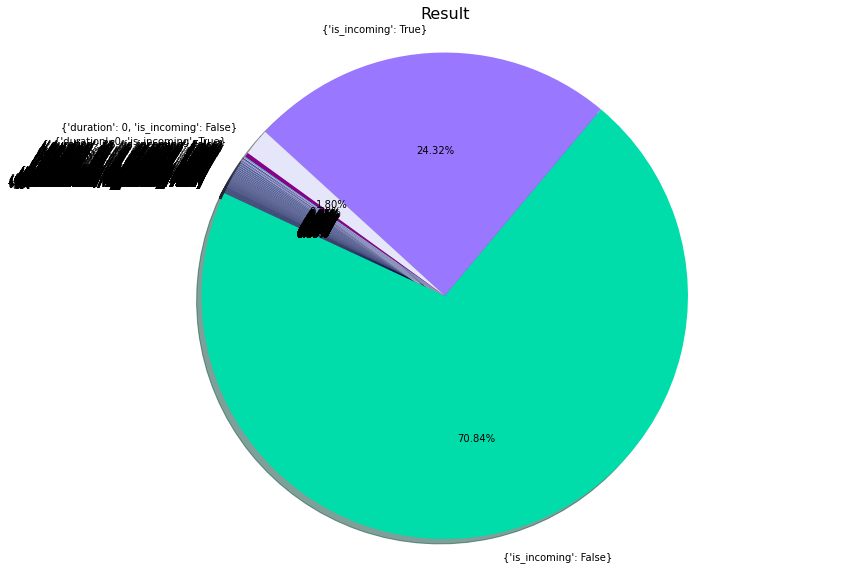

In [53]:
Numbers3 =DataE.additional_data.value_counts()
labels=np.array(Numbers3.index)
sizes = Numbers3.values
colors = ['#00DDAA', '#9977FF', '#E6E6FA', '#8B008B']
plt.figure(figsize = (14,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True,startangle=155)
plt.title('Result',fontsize=16)
plt.axis('equal',fontsize=12)
plt.show()

<Figure size 1296x576 with 0 Axes>

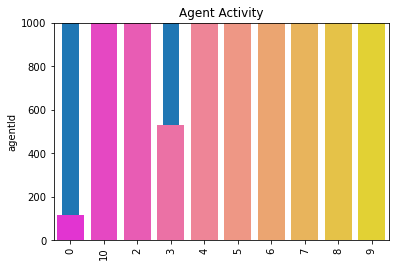

In [80]:
plt.figure(figsize = (18,8))
Agents_Attempt = DataE.agentId.value_counts()[:1000]
fig, ax = plt.subplots()
ax.set_ylim([0,1000])
ax.set_ylabel("Count")
ax.set_title("Agent Activity")
Agents_Attempt.plot.bar()
sns.barplot(x = Agents_Attempt.index, y = Agents_Attempt, orient='v', palette="spring");
plt.show()

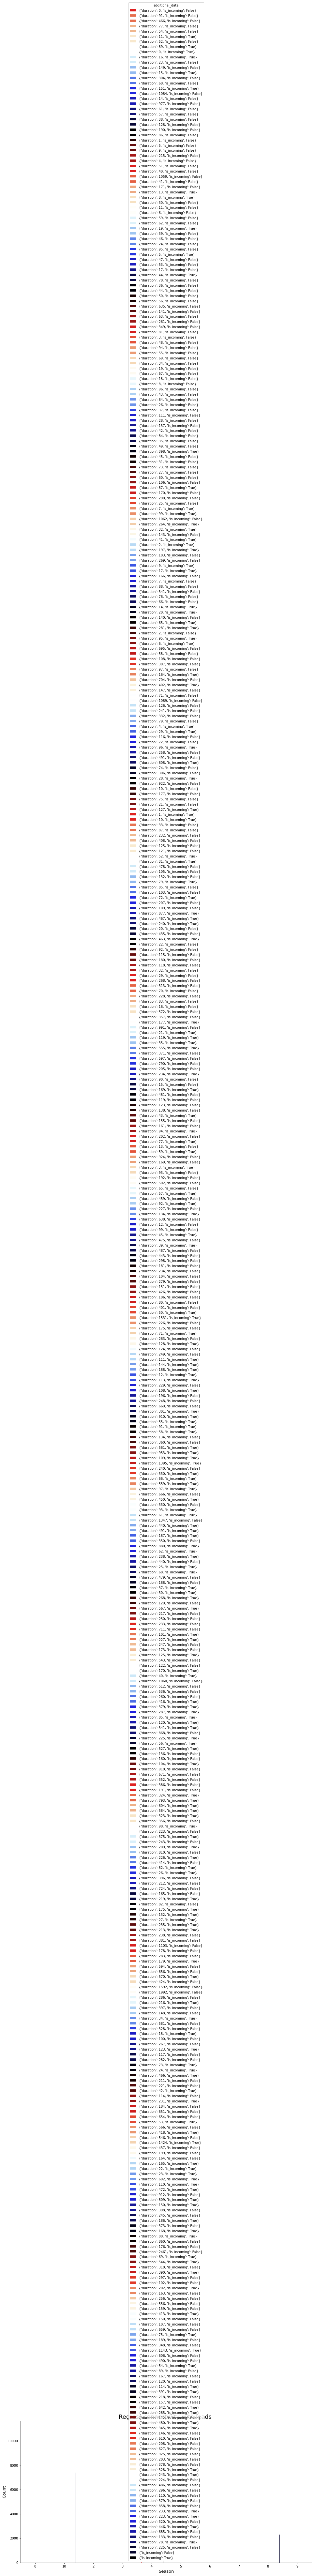

In [82]:
plt.figure(figsize = (16,8))
sns.countplot('agentId',hue='additional_data',data=DataE,palette='flag')
plt.title("Regress connectivity with leads ",fontsize=18)
plt.xlabel("Season",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.show()

In [86]:
Agent_devlopment=DataE.drop_duplicates(subset=['additional_data'], keep='last')

Agent_devlopment[['additional_data']].reset_index(drop=True).sort_values('additional_data')

additional_data
489    {'duration': 0, 'is_incoming': False}
485     {'duration': 0, 'is_incoming': True}
269    {'duration': 1, 'is_incoming': False}
398     {'duration': 1, 'is_incoming': True}
394   {'duration': 10, 'is_incoming': False}
..                                       ...
348   {'duration': 99, 'is_incoming': False}
276    {'duration': 99, 'is_incoming': True}
56   {'duration': 991, 'is_incoming': False}
491                   {'is_incoming': False}
490                    {'is_incoming': True}

[492 rows x 1 columns]

In [87]:
Agent_devlopment.groupby(['leadId','agentId']).size()

leadId  agentId
94      4           1
755     10          2
1659    10         11
2629    4           1
2763    4           1
                   ..
62423   10          1
62431   8           1
62868   7           1
63082   8           1
63202   9           1
Length: 315, dtype: int64

In [90]:
Agent_devlopment[['leadId','additional_data']].reset_index(drop=True)

leadId                           additional_data
0     50411   {'duration': 466, 'is_incoming': False}
1      6670     {'duration': 89, 'is_incoming': True}
2     57367   {'duration': 149, 'is_incoming': False}
3     57367   {'duration': 304, 'is_incoming': False}
4     57367  {'duration': 1084, 'is_incoming': False}
..      ...                                       ...
487    4706    {'duration': 38, 'is_incoming': False}
488    4706    {'duration': 68, 'is_incoming': False}
489   50347     {'duration': 0, 'is_incoming': False}
490   31965                     {'is_incoming': True}
491   16281                    {'is_incoming': False}

[492 rows x 2 columns]

<Figure size 2160x1440 with 0 Axes>

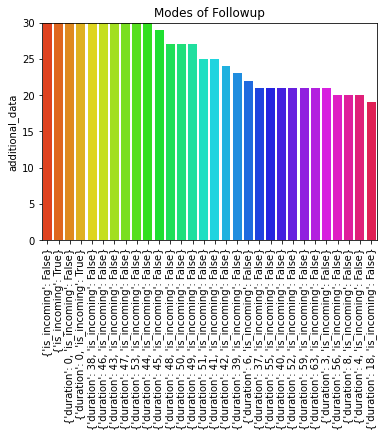

In [89]:
plt.figure(figsize = (30,20))
Mode_of_agent = DataE.additional_data.value_counts()[:30]
fig, ax = plt.subplots()
ax.set_ylim([0,30])
ax.set_ylabel("Count")
ax.set_title("Modes of Followup")
Mode_of_agent.plot.bar()
sns.barplot(x = Mode_of_agent.index, y = Mode_of_agent, orient='v', palette="hsv");
plt.show()